<a href="https://colab.research.google.com/github/Akage1234/nn-zero-to-hero/blob/main/makemore/02_makemore_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt -O names.txt

--2025-10-13 10:25:28--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2025-10-13 10:25:28 (12.0 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
words = open('names.txt', 'r').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3
X, Y = [],[]
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
C = torch.randn((27, 2)) # embeddings
C

tensor([[-0.5991, -1.6354],
        [-0.8844,  0.7034],
        [ 1.2667, -0.9102],
        [ 0.6666, -0.5938],
        [ 0.7040,  2.5623],
        [-0.1380,  0.9136],
        [-2.1021, -1.1910],
        [-0.0758, -0.7829],
        [ 0.1098,  0.9282],
        [-0.0044,  0.1388],
        [-1.4648,  0.3031],
        [ 0.9624, -0.6905],
        [ 1.4715, -1.5286],
        [ 0.6377, -0.6384],
        [-0.0107, -0.1069],
        [ 1.0135,  1.1382],
        [-1.6332,  0.4877],
        [ 0.0146, -0.8242],
        [-0.8577,  0.3295],
        [-0.3202, -0.1783],
        [ 1.0670,  1.5238],
        [ 0.5956, -0.0104],
        [-0.1497, -0.8078],
        [-1.3113,  0.3013],
        [-1.7027, -0.1843],
        [ 0.7970, -0.2987],
        [ 0.1983, -1.1763]])

In [ ]:
C[5]

tensor([-0.1380,  0.9136])

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
# one way to make dimensions [32,6]
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [ ]:
# significantly better way
emb.view(32,6).shape

torch.Size([32, 6])

In [ ]:
h = torch.tanh(emb.view(-1,6) @ w1 + b1)
h.shape

torch.Size([32, 100])

In [ ]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ w2 + b2
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.shape

torch.Size([32, 27])

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean()

In [ ]:
loss

tensor(14.7821)

### putting it all together

In [ ]:
block_size = 3
def build_dataset(words):
    X, Y = [],[]
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

In [ ]:
Xtr.shape, Ytr.shape # train dataset
Xval.shape, Yval.shape # val dataset
Xtest.shape, Ytest.shape # test dataset

(torch.Size([22799, 3]), torch.Size([22799]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1= torch.randn((30,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

17697

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri= []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
    # mini batch contruct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix]) # same thing more efficient
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # track stats
    lossi.append(loss.log10().item())
    stepi.append(i)

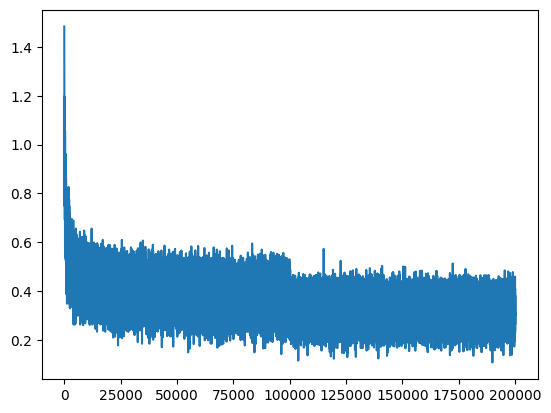

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
# training loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss)

tensor(2.1202, grad_fn=<NllLossBackward0>)


In [ ]:
# validation loss
emb = C[Xval] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yval)
print(loss)

tensor(2.1105, grad_fn=<NllLossBackward0>)


In [ ]:
# test loss
emb = C[Xtest] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytest)
print(loss)

tensor(2.1193, grad_fn=<NllLossBackward0>)


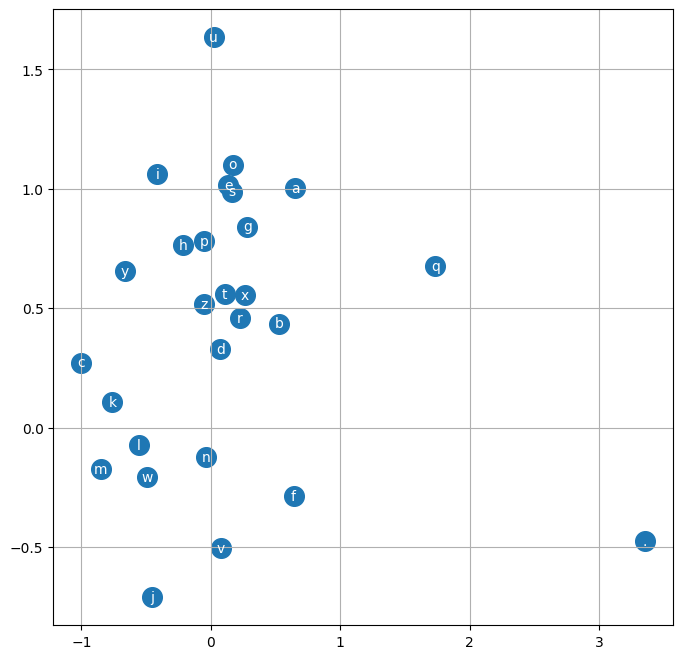

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        prob = F.softmax(logits, dim=1)
        ix = torch.multinomial(prob, num_samples=1, generator=g).item()
        context= context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carmahza.
brilli.
kimir.
reh.
cassanden.
jazone.
faresah.
pireei.
nellara.
chaiir.
kaleig.
hham.
pormier.
juzs.
lilea.
jamiquinathonderryni.
fine.
pirra.
mel.
ezi.
